# Trabajo Semanal N°2
<img src="logo_UTN.svg" title="Asi es como se añade una imagen en Markdown" align="right" width="150"> 

## Teoría de Circuitos II
### Alumno: Federico Albero
### Curso: R4001

### Red circuital: Configuración Ackerberg - Mossberg

<img src="TS2_RedCircuital.png" title="Circuito TS2" >

### Resolución ejercicios 1, 2, 3 y bonus I, II, III, IV:
Se adjunta a continuación archivo PDF con la resolución a mano de dichos incisos.

In [1]:
from IPython.display import IFrame
IFrame("./TS2_FAlbero_R4001_Completa.pdf", width=1000, height=1000)

### Bonus V: Simulaciones de todos los experimentos

#### Filtro pasa bajos - Configuración Ackerberg Mossberg ($\omega_0=1\,y\,Q=3$)

\begin{equation}
T(s) = \frac{V_{o (s)}}{V_{i (s)}} = \frac{ (\frac{-R_3}{R_1}) \cdot \omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}
\end{equation}

\begin{equation}
Donde: \omega_0=\frac{1}{R_3C}\,y\,Q=\frac{R_2}{R_3}
\end{equation}

##### Simulación numérica

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

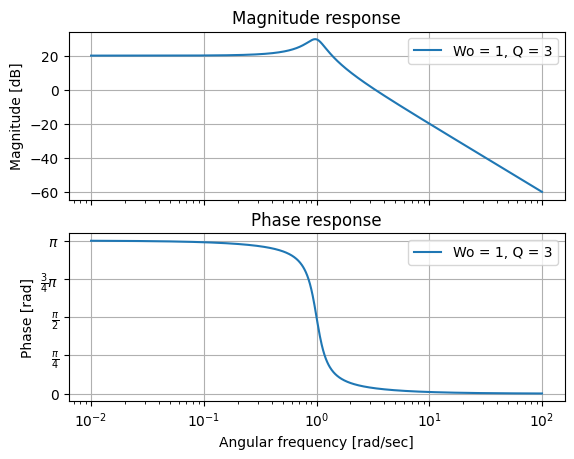

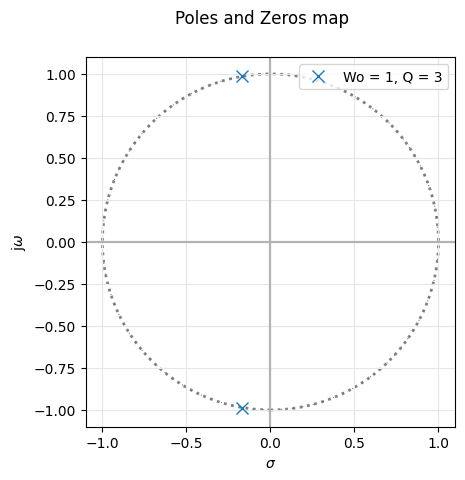

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 22:05:46 2023

@author: fede23
"""

#%% Simulación Filtro Pasa Bajo configuración Ackerberg Mossberg - Trabajo Semanal 2 %%#

from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import pzmap, bodePlot

# Transferencia T(S) = (-R3/R1) * ( Wo² ) / ( S² + Wo/Q + Wo² )
# Wo = 1/(R3*C)
# Q = R2/R3
# Wo/Q = 1/(R2*C)
# Ganancia K: K = -R3/R1

# Valores componentes desnormalizados:
R1 = 100
R2 = 3000
R3 = 1000
R4 = 1000 # no se usa
C = 1e-3

# Parámetros del circuito
K = (-1)*(R3/R1)
Wo = 1/(R3*C)
Q = (R2/R3)

tf = TransferFunction( [K*(Wo**2)], [1, (Wo/Q), (Wo**2)] )
bodePlot(tf, fig_id=1, filter_description = 'Wo = 1, Q = 3')
pzmap(tf, fig_id=2, filter_description = 'Wo = 1, Q = 3')

##### Simulación circuital

<img src="TS2_FiltroPasaBajos_Circuito.png" title="Circuito LPF">

<img src="TS2_FiltroPasaBajos_Grafico.png" title="Respuesta en frecuencia y fase de LPF 2° orden">

**Análisis:** A través de estos gráficos, se pudieron verificar los siguientes resultados obtenidos previamente de manera analítica: (tener en cuenta que en la simulación númerica, el eje X está en unidades de frecuencia angular $\omega\,[\frac{rad}{seg}]$, mientras que en la simulación circuital este eje está medido en Hertz $[H_z=\frac{1}{seg}]$)
* $|T_{(w=0)}| = 20\,dB\,(10\,veces)$.
* El cursor de la simulación en LTSpice se encuentra situado en $f_o=0.159Hz$, correspondiente a $w_o=1\,rad/s$, donde aproximadamente se obtiene el valor máximo de la transferencia.
* En la banda de atenuación, el filtro posee una pendiente de $-40dB\,/\,dec$, lo cual es esperable en un filtro de segundo orden.

#### Filtro pasa bajos - Configuración Ackerberg Mossberg - Butterworth ($\omega_0=1\,y\,Q=\frac{\sqrt{2}}{2}$) 

\begin{equation}
T_{B(s)} = \frac{V_{o (s)}}{V_{i (s)}} = \frac{ (\frac{-R_3}{R_1}) \cdot 1}{s^2+s\cdot2\cos(\psi)+1}
\end{equation}

\begin{equation}
Donde: \psi=\frac{\pi}{4}
\end{equation}

##### Simulación numérica

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

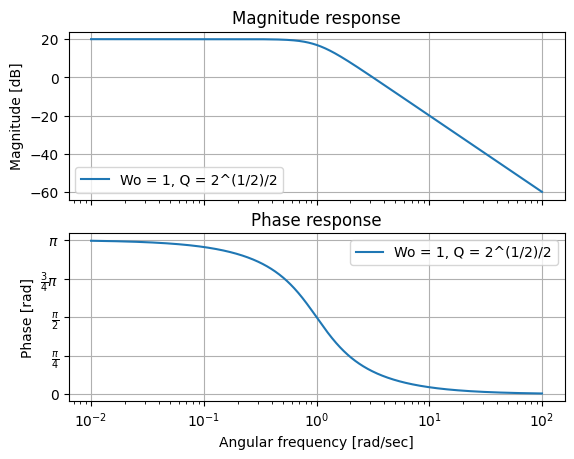

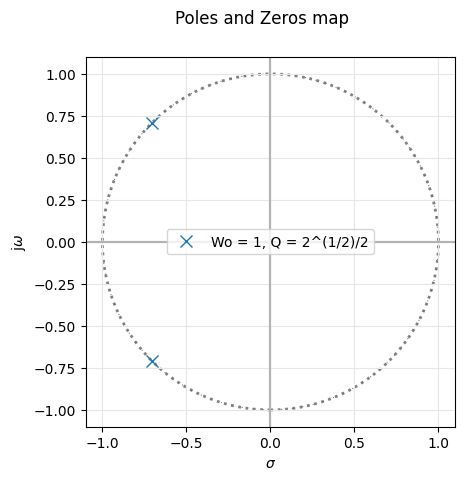

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 22:38:54 2023

@author: fede23
"""

#%% Simulación Filtro Pasa Bajo configuración Ackerberg Mossberg (Butterworth) - Trabajo Semanal 2 %%#

from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import pzmap, bodePlot
import numpy as np

# Transferencia T(S) = (-R3/R1) * ( Wo² ) / ( S² + Wo/Q + Wo² )
# Wo = 1/(R3*C)
# Q = R2/R3
# Wo/Q = 1/(R2*C)
# Ganancia K: K = -R3/R1

# Valores componentes desnormalizados:
R1 = 100
R2 = (np.sqrt(2)/2)*1000 # Cambia el valor de R2 al convertirlo en Butterworth al FPB
R3 = 1000
R4 = 1000 # no se usa
C = 1e-3

# Parámetros del circuito
K = (-1)*(R3/R1)
Wo = 1/(R3*C)
Q = (R2/R3) # Cambia el Q, pasa de 3 a np.sqrt(2)/2

tf = TransferFunction( [K*(Wo**2)], [1, (Wo/Q), (Wo**2)] )
bodePlot(tf, fig_id=1, filter_description = 'Wo = 1, Q = 2^(1/2)/2')
pzmap(tf, fig_id=2, filter_description = 'Wo = 1, Q = 2^(1/2)/2')

Nota: No supe como poner $\frac{\sqrt{2}}{2}$ en las etiquetas de la simulación numérica, entonces lo reemplacé por "2^(1/2)/2".

##### Simulación circuital

<img src="TS2_FiltroPasaBajos_Butter_Circuito.png" title="Circuito LPF Buttter">

<img src="TS2_FiltroPasaBajos_Butter_Grafico.png" title="Respuesta en frecuencia y fase de LPF Butter 2° orden">

**Análisis:** A través de estos gráficos, se pudieron verificar los siguientes resultados obtenidos previamente de manera analítica: (tener en cuenta que en la simulación númerica, el eje X está en unidades de frecuencia angular $\omega\,[\frac{rad}{seg}]$, mientras que en la simulación circuital este eje está medido en Hertz $[H_z=\frac{1}{seg}]$)
* $|T_{(w=0)}| = 20\,dB\,(10\,veces)$, al igual que en el caso anterior.
* En este caso, se observa una mayor planicidad en la banda de paso y no hay un sobrepico en la frecuencia de corte.
* Tambien presenta una atenuación de $-40dB\,/\,dec$ en la banda de rechazo.

#### Filtro pasa banda - Configuración Ackerberg Mossberg ($\omega_0=1\,y\,Q=3$)

\begin{equation}
T(s) = \frac{V_{o (s)}}{V_{i (s)}} = \frac{ (\frac{-1}{R_1C}) \cdot s}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}
\end{equation}

\begin{equation}
Donde: \omega_0=\frac{1}{R_3C}\,y\,Q=\frac{R_2}{R_3}
\end{equation}

##### Simulación numerica

/home/fede23/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

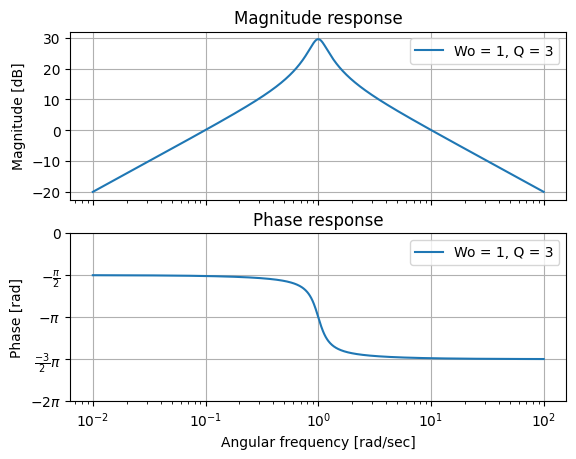

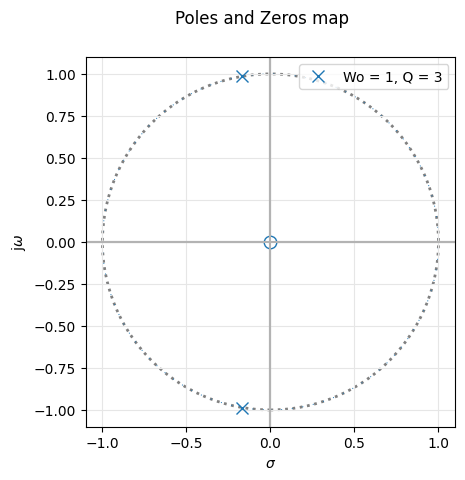

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 23:11:03 2023

@author: fede23
"""

#%% Simulación Filtro Pasa Banda configuración Ackerberg Mossberg - Trabajo Semanal 2 %%#

from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import pzmap, bodePlot

# Transferencia T(S) = (-1/(R1*C)) * ( S ) / ( S² + Wo/Q + Wo² )
# Wo = 1/(R3*C)
# Q = R2/R3
# Wo/Q = 1/(R2*C)
# Ganancia K: K = (-1/(R1*C))

# Valores componentes desnormalizados:
R1 = 100
R2 = 3000
R3 = 1000
R4 = 1000 # no se usa
C = 1e-3

# Parámetros del circuito
K = (-1)*(1/(R1*C))
Wo = 1/(R3*C)
Q = (R2/R3)

tf = TransferFunction( [0, K, 0], [1, (Wo/Q), (Wo**2)] )
bodePlot(tf, fig_id=1, filter_description = 'Wo = 1, Q = 3')
pzmap(tf, fig_id=2, filter_description = 'Wo = 1, Q = 3')

Nota: El Spyder me arrojó un warning por como escribí los coeficientes del numerador en la transferencia del filtro pasa banda, aunque los resultados obtenidos fueron correctos.
"tf = TransferFunction( [0, K, 0], [1, (Wo/Q), (Wo**2)] )"

##### Simulación circuital

<img src="TS2_FiltroPasaBanda_Circuito.png" title="Circuito BPF">

<img src="TS2_FiltroPasaBanda_Grafico.png" title="Respuesta en frecuencia y fase de BPF 2° orden">

**Análisis:** A través de estos gráficos, se pudieron verificar los siguientes resultados obtenidos previamente de manera analítica: (tener en cuenta que en la simulación númerica, el eje X está en unidades de frecuencia angular $\omega\,[\frac{rad}{seg}]$, mientras que en la simulación circuital este eje está medido en Hertz $[H_z=\frac{1}{seg}]$)
* Ganancia de casi 30dB en la frecuencia de corte (29,54dB).
* Atenuación de $\pm\,20dB\,/\,dec$ en las bandas de rechazo, lo cual corresponde a un filtro pasa banda de segundo orden.